In [1]:
## B5 - Persuadee only 
## B6 - Both Persuader and Persuadee
import pandas as pd

# Load the persuasion data under the data folder
dialog_data = pd.read_excel('data\\persuasion_for_good\\300_dialog.xlsx')
info_data = pd.read_excel('data\\persuasion_for_good\\300_info.xlsx')

In [2]:
# tmp = info_data[(info_data['B5'].notna()) & (info_data['B5'] != 0)]
tmp = info_data
info_data = tmp[tmp['B4'] != 0]

In [3]:
info_data['B5'].fillna(0, inplace=True)
info_data['B6'].fillna(0, inplace=True)

C:\Users\Samavedam\AppData\Local\Temp\ipykernel_24416\3658305755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  info_data['B5'].fillna(0, inplace=True)
C:\Users\Samavedam\AppData\Local\Temp\ipykernel_24416\3658305755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_data['B5'].fillna(0, inplace=True)
C:\Users\Samavedam\AppData\Loca

In [4]:
# info_data['B5'] = info_data['B5'].astype(int)
# info_data['B5'] = info_data['B5'].apply(lambda x: 1 if x != 0 else 0)


Increase:  43
Decrease:  108
Same:  149


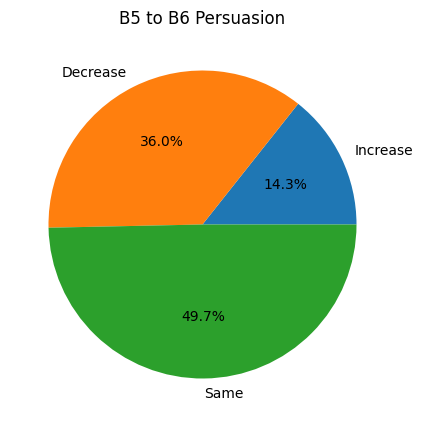

In [5]:
# Visualize the data as per the requirement that the value has increased from B5 to B6, remained the same or decreased

# Increase
increase = info_data[info_data['B5'] < info_data['B6']]

# Decrease
decrease = info_data[info_data['B5'] > info_data['B6']]

# Same
same = info_data[info_data['B5'] == info_data['B6']]

print('Increase: ', increase.shape[0])
print('Decrease: ', decrease.shape[0])
print('Same: ', same.shape[0])

# PErcentage plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# plt.bar(['Increase', 'Decrease', 'Same'], [increase.shape[0], decrease.shape[0], same.shape[0]])
plt.pie([increase.shape[0], decrease.shape[0], same.shape[0]], labels=['Increase', 'Decrease', 'Same'], autopct='%1.1f%%')
plt.title('B5 to B6 Persuasion')
plt.show()


In [6]:
# tmp[tmp['B6'] > tmp['B5']].shape[0] # positive # 8
# tmp[tmp['B6'] == tmp['B5']].shape[0] # Neutral 94
# tmp[tmp['B6'] < tmp['B5']].shape[0] # Negative # 135

<Figure size 300x200 with 0 Axes>

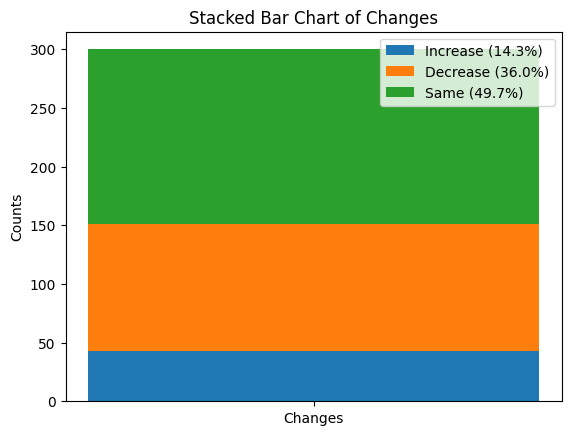

In [7]:
# Conver this piec chart to a stacked bar chart
# plt.pie([increase.shape[0], decrease.shape[0], same.shape[0]], labels=['Increase', 'Decrease', 'Same'], autopct='%1.1f%%')

# Assuming increase, decrease, same are pandas DataFrames or arrays
increase_count = increase.shape[0]
decrease_count = decrease.shape[0]
same_count = same.shape[0]

# Total count
total_count = increase_count + decrease_count + same_count

# Calculate percentages for each category
increase_pct = (increase_count / total_count) * 100
decrease_pct = (decrease_count / total_count) * 100
same_pct = (same_count / total_count) * 100

# Create the stacked bar chart
categories = ['Increase', 'Decrease', 'Same']
counts = [increase_count, decrease_count, same_count]

plt.figure(figsize=(3, 2))
# Plotting the stacked bar chart
fig, ax = plt.subplots()

# Create a single bar with stacked segments
ax.bar('Changes', increase_count, label=f'Increase ({increase_pct:.1f}%)')
ax.bar('Changes', decrease_count, bottom=increase_count, label=f'Decrease ({decrease_pct:.1f}%)')
ax.bar('Changes', same_count, bottom=increase_count + decrease_count, label=f'Same ({same_pct:.1f}%)')

# Add labels and title
ax.set_ylabel('Counts')
ax.set_title('Stacked Bar Chart of Changes')
ax.legend()

plt.show()


In [8]:
info_data['persuasion'] = info_data['B6'] - info_data['B5']

C:\Users\Samavedam\AppData\Local\Temp\ipykernel_24416\4220027248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_data['persuasion'] = info_data['B6'] - info_data['B5']


In [9]:
increase_df = info_data[info_data['persuasion'] > 0]
decrease_df = info_data[info_data['persuasion'] < 0]
same_df = info_data[info_data['persuasion'] == 0]

In [10]:
increase_df['persuasion'].mean()

np.float64(1.8223255813953492)

In [11]:
decrease_df['persuasion'].mean()

np.float64(-107.30152777777779)

In [12]:
same_df['persuasion'].mean()

np.float64(0.0)

In [13]:
info_data['persuasion'].mean()

np.float64(-38.36735)

In [14]:
# info_data['B6'].mean()
info_data[info_data['B6'] > 0]['B6'].mean()

np.float64(2.5925)

In [18]:
tmp

,B2,B3,B4,B5,B6,B7
0,20180717-200206_41_live,user_1843,0,NaN,0.5,10.0
1,20180717-200206_41_live,user_1494,1,0.5,0.5,10.0
2,20180719-120436_413_live,user_1556,0,NaN,0.0,10.0
3,20180719-120436_413_live,user_1363,1,NaN,0.0,10.0
4,20180719-122534_38_live,user_83,0,NaN,0.0,11.0
...,...,...,...,...,...,...
595,20180904-043300_214_live,user_1473,1,NaN,0.0,10.0
596,20180904-045349_715_live,user_585,0,NaN,0.0,11.0
597,20180904-045349_715_live,user_1810,1,0.2,0.0,11.0
598,20180904-073734_888_live,user_1237,0,NaN,1.0,NaN


In [19]:
info_data

,B2,B3,B4,B5,B6,B7,persuasion
1,20180717-200206_41_live,user_1494,1,0.5,0.50,10.0,0.00
3,20180719-120436_413_live,user_1363,1,0.0,0.00,10.0,0.00
5,20180719-122534_38_live,user_1222,1,5.0,0.50,11.0,-4.50
7,20180719-165941_192_live,user_845,1,50.0,0.00,10.0,-50.00
9,20180719-175233_833_live,user_324,1,0.0,0.05,10.0,0.05
...,...,...,...,...,...,...,...
591,20180904-030739_178_live,user_621,1,0.0,0.00,10.0,0.00
593,20180904-032932_423_live,user_1169,1,1.0,1.00,11.0,0.00
595,20180904-043300_214_live,user_1473,1,0.0,0.00,10.0,0.00
597,20180904-045349_715_live,user_1810,1,0.2,0.00,11.0,-0.20


In [23]:
dialog_data.head(3)

,Unnamed: 0,B2,B4,Turn,Unit,er_label_1,ee_label_1,er_label_2,ee_label_2,neg,neu,pos
0,0,20180719-210146_172_live,0,0,Hello.,greeting,NaN,NaN,NaN,0.0,1.000,0.000
1,1,20180719-210146_172_live,0,0,How are you?,greeting,NaN,NaN,NaN,0.0,1.000,0.000
2,2,20180719-210146_172_live,1,0,"I'm good, how are you doing?",NaN,greeting,NaN,NaN,0.0,0.633,0.367


In [40]:
# # COncatenate the column "Turn" for the group data.
# tmp2 = dialog_data.groupby(by=['B2'])[['Turn','Unit']].apply(lambda x, y: '\n'.join(x))
# tmp2 = tmp2.reset_index()
# print(tmp2.iloc[0,:]['Unit'])



result = dialog_data.groupby('B2').apply(
    lambda x: '\n'.join(f"{"Persuadee" if row['B4'] == 1 else "Persuader"}: {row['Unit']}" for _, row in x.iterrows())
).reset_index(name='Combined_Text')

# Set 'Category' as the index
# result.set_index('B2', inplace=True)

C:\Users\Samavedam\AppData\Local\Temp\ipykernel_24416\3593707056.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = dialog_data.groupby('B2').apply(


In [44]:
# Iterate over the rows and collapse the conversation of same person into a single string before changing to other person
print(result.iloc[0,:]['Combined_Text'])

Persuader: Hey, how are you doing, have you ever heard of a charity called Save the Children?
Persuadee: No I havent.
Persuadee: What is it about?
Persuader: It's an international organization that promotes children's rights, provides relief and helps support children in developing countries, does that sound like something you'd get behind?
Persuadee: No thank you.
Persuader: May I ask why?
Persuader: Your help could really make a difference in a child's life, think of a child who didn't have enough to eat, just a small bit of help may have saved them, are you sure you're not interested?
Persuadee: I am already making a difference in many children lives.
Persuader: That's great, it sounds like it's an issue you really care about then, why not put some of that effort into a charity that's doing really great work like Save the Children?
Persuadee: I have donated 15 years of my life to charity
Persuader: I'm not asking you to donate years of your life, just a couple of cents if possible, 